<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/XRayFullImagesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
#hide
!pip install -Uqq fastbook
#!git clone 'https://github.com/avkornaev/Fast_AI_course'
#!wget <ENTER URL> Download dataset from the web with

Connect to Google disk.

In [51]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import libraries. Connect to Google disk.

In [52]:
import fastbook
#fastbook.setup_book() #an alternative to drive.mount with gdrive path instead of drive path 
import numpy as np
import pandas as pd
from fastbook import *
from fastai.data.all import *
from fastai.vision.all import *
from fastai.vision.widgets import *

Path.


In [53]:
dataPath = Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/')
imdsFolder = 'images'
#root_dir = dataPath
#base_dir = root_dir
#print(os.getcwd()) # current directory

In [54]:
print(os.getcwd()) # current directory

/content


Settings.

In [55]:
initImSize = 1024
reqImSize = 224
cropRatio = reqImSize/initImSize
NoOfImds = 24 # desired number or 'all'
NoOfDispImds = 4 # number of displayed images
batchSize = 8

Create list of classes.

In [56]:
classes = ['0 - Negative','1 - Typical','2 - Indeterminate','3 - Atypical']
n = len(classes)
print(os.getcwd()) # current directory
print(os.listdir('/content')) # and it's content

/content
['.config', 'drive', 'sample_data']


In [57]:
import json
with open(dataPath/"targets.json", "r") as f:
    targets = json.load(f)
#print(targets)

Check an image information.

In [58]:
image_id = '000a312787f2'
print('study level (class number): ', targets[image_id]['study_level'])
print('image level (bounding boxes): ', targets[image_id]['image_level'])
print('metadata (additional info from the DICOM image file): ', targets[image_id]['metadata'])

study level (class number):  1
image level (bounding boxes):  {'boxes': [[0.18545309210526317, 0.16698117832568807, 0.42667880169172934, 0.7166666485091744], [0.5277049060150376, 0.16949692660550458, 0.7849092340225564, 0.6745283027522936]], 'labels': [1, 1], 'image_id': '000a312787f2', 'iscrowd': [0, 0], 'area': [6653.2506748157, 6517.674527234884]}
metadata (additional info from the DICOM image file):  [0.1976, 0.35119999999999996, 0.5, -0.44066666666666665, -0.16366666666666668, 0.5, 0.0, 0.0, -0.75, -0.5, -0.5, -0.4166666666666667]


Create data frame.

In [59]:
targetsDFa = pd.DataFrame(targets) # auxiliary dataFrame
targetsDF = np.array([list(targetsDFa.columns+'.png'), list(targetsDFa.loc['study_level'].values)])
targetsDF = pd.DataFrame(targetsDF.T, columns = ['file_name', 'label'])

In [60]:
if NoOfImds != 'all':
  targetsDF = targetsDF[0:NoOfImds]

In [61]:
targetsDF.head()

,file_name,label
0,65761e66de9f.png,1
1,51759b5579bc.png,3
2,f6293b1c49e2.png,0
3,3019399c31f4.png,0
4,bb4b1da810f3.png,3


In [62]:
targetsDF.values.shape

(24, 2)

In [63]:
len(targetsDF)

24

Download and import of X-ray images.

https://docs.fast.ai/tutorial.medical_imaging.html#Download-and-import-of-X-ray-DICOM-files

https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_df

https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb#scrollTo=vP4nen7N383Q

In [64]:
#images_source = untar_data()
# xray = ImageDataLoaders.from_df(targetsDF, path=dataPath/imdsFolder, valid_pct=0.2,
#                                 seed=42, fn_col=0, folder=None, 
#                                 suff='', label_col=1, label_delim=None, 
#                                 y_block=None, valid_col=None, item_tfms=Resize(224), 
#                                 batch_tfms=None, bs=64, val_bs=None, 
#                                 shuffle=None, device=None)
# item_tfms=Resize(128)

xray = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=lambda x: dataPath/imdsFolder/x[0],
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: x[1],
    item_tfms=Resize(reqImSize))
    #item_tfms=RandomCrop(reqImSize))

In [65]:
#?DataBlock.dataloaders

In [66]:
dls = xray.dataloaders(targetsDF.values, path=dataPath/imdsFolder,
                       num_workers=0, verbose=True, bs=batchSize)

 ['51759b5579bc.png' '3']
 ['f6293b1c49e2.png' '0']
 ['3019399c31f4.png' '0']
 ['bb4b1da810f3.png' '3']
 ['3fadf4b48db3.png' '0']
 ['bf1f75117093.png' '0']
 ['1df3e98f79be.png' '2']
 ['ad8d4a5ba8f0.png' '2']
 ['09cf9767a7bf.png' '1']
 ['12a2dfb55b6f.png' '1']
 ['bcd2179fa24e.png' '0']
 ['136af218f8df.png' '0']
 ['7e7d3afebf5d.png' '2']
 ['45742200dd51.png' '0']
 ['b81969467c6b.png' '0']
 ['74077a8e3b7c.png' '3']
 ['6534a837497d.png' '3']
 ['b98508598396.png' '2']
 ['92552b44c70c.png' '0']
 ['390ce1f029e7.png' '0']
 ['f8ded2e15154.png' '1']
 ['1ebbe0481d58.png' '0']
 ['31376011baec.png' '1']]
Found 24 items
2 datasets of sizes 20,4
Setting up Pipeline: <lambda> -> PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -- {'size': (224, 224), 'method': 'crop', 'pad_mode': 'reflection', 'resamples': (2, 0), 'p': 1.0} -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline

Check images (optional).

In [67]:
#hide
fns = get_image_files(dataPath/imdsFolder)
fns
#failed = verify_images(fns)
#print(failed)
#failed.map(Path.unlink);

(#6331) [Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/ee33ec236561.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/03cafeb389a1.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/9c0c6581bc36.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/5c7b5fe49437.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/89fc91cc28bb.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/f82f99deaae2.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/657cadad1932.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/e885aaec6e66.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/eeef8cafe0b0.png'),Path('/content/drive/MyDrive/Covid_detection_Kaggle_summer_2021/images/267f44ef1151.png')...]

Visualise a batch of images.

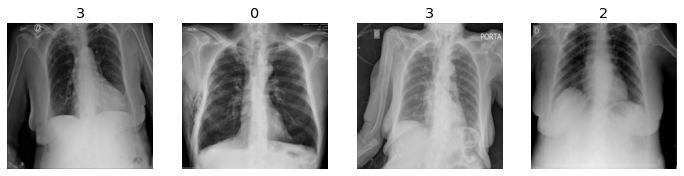

In [68]:
#dls = xray.dataloaders(targetsDF.values, num_workers=0)
dls.train.show_batch(max_n=4, nrows=1, unique=None) # uniqu=True allows to display only 1 image

Crop and augment images.

In [69]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,2.744425,2.227452,1.000000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,2.224428,0.757144,0.500000,00:03
1,1.792366,0.350532,0.000000,00:03


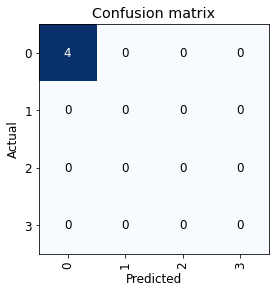

In [70]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Check top losses.

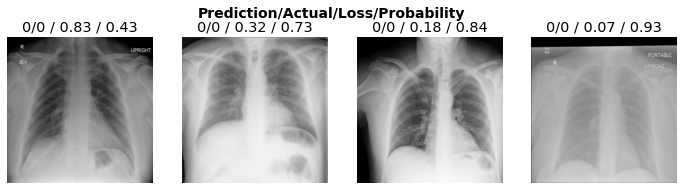

In [71]:
interp.plot_top_losses(NoOfDispImds, nrows=1)

In [72]:
#xray = xray.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
#xray.show_batch(max_n=4, nrows=1, unique=True)

In [73]:
#learn.export()

Upload an image to check the ANN.

In [74]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

References

[1] https://docs.fast.ai/tutorial.medical_imaging.html#Download-and-import-of-X-ray-DICOM-files